#  Capstone Project: The Battle of the Neighborhoods   (Week2)

## MOVING TO ATLANTA, GEORGIA. ANALYSIS OF THE JOURNEY.

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

The purpose of this Project will be centered in explorer all the facilities available around the list of cities in Atlanta, Georgia to provide an deep analysis and reports  that allow people and myself to take the best decision when I will go to Atlanta.

As we describe above, main problem is the difficulty that people have to take decision when they want to migrate to other state or countries. In this particular case I will migrate to Atlanta, Georgia in some months so creating this analysis will help me to take a better decision selecting a City in Atlanta, rent an apartment, select a good school and university for my daughter and son. One important point is consider Fulton County in Atlanta as a cardinal point to start the analysis around the cities.

For that reason, in the solution to develop analysis of features for a people migrating to Atlanta and search a best city as a comparative analysis. In that case showing list of venues availables by cities which allow to show the bunch of categories to consider when rent a house. The features include median housing price and better school according to ratings, to taking decision. 
Also provide a plot information with index in schools, universities and house prices in Atlanta cities. 


## Data <a name="data"></a>

The following data was considered in the analysis:

    1.- Cities and Counties Data: 
I found the list of Cities and Counties from Wikipedia : https://en.wikipedia.org/wiki/List_of_municipalities_in_Georgia_(U.S._state) .I will scrapped the data from the wiki, then cleaned and reduced to be applied creating choropleth map .

    2.- Coordinates for Georgia Cities:
I created own table with Coordinates (Latitude and Longitude) using Google Maps. That info will be merged with data from Cities and Counties. [2]
In this case , since the Geocoder is not allowing to retrieve information related coordinates , we wil create extract coordinates directly using Google Map.

    3.- Foursquare API Data:
We will use “Foursquare API” to extract data from the most common venues of each city in Atlanta. It will help us to provide the options in the comparative analysis. [3]
In this case we will use the credentials already created to consume the venues.

    4.-School, Colleges, University ranking and price of house rental  Data
I will create own tables for School, Colleges,  University Ranking  extracting from different websites It will help us to provide ranking analysis. [4]
There are not too many public datas related to Education and rental prices of apartments. Therefore I will create own tables to collect that information for our analysis.


#### Importing libraries and scraping wikipedia to extract main base data of Cities and Counties in Atlanta, Georgia

In [1]:
import requests # library to handle requests

from bs4 import BeautifulSoup 

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import pandas as pd

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
# Extract and Generate Georgia City dataset

url_city = 'https://en.wikipedia.org/wiki/List_of_municipalities_in_Georgia_(U.S._state)'

resp=requests.get(url_city) 

#http_respone 200 means OK status 
if resp.status_code==200: 
    print("Successfully opened the web page") 
    
    # we need a parser,Python built-in HTML parser is enough . 
    soup=BeautifulSoup(resp.text,'html.parser')     
  
    # table is the list which contains all the text 
    table=soup.findAll("table",{"class":"wikitable sortable"})

else: 
    print("Error") 
    

Successfully opened the web page


#### Create dataframe based in the scrape table, setting City , County , Population and Density

In [3]:
df_City = pd.read_html(str(table[1]))
df_City = df_City[0].dropna(axis=0)
column_names = ['City','Type','County','Population','Population_2000','Change','Land','Density','Extr']
df_City.columns = column_names
df_City.drop(['Type', 'Population_2000', 'Change', 'Density', 'Extr'], axis=1, inplace=True)
df_City['City'] = df_City['City'].replace("†", " ",regex=True)
df_City.head()

,City,County,Population,Land
0,Abbeville,Wilcox,2908,3.06
1,Acworth,Cobb,20425,8.24
2,Adairsville,Bartow,4648,9.11
3,Adel,Cook,5334,8.06
4,Adrian,"Emanuel, Johnson",664,1.37


#### Here we will merge Coordinates data with our current City data to include  Latitud and Longitud data from the Atlanta Cities. Since  google geocoder library is having issues we built a file with coordinates using Google Maps that will be used for this purpose

In [4]:
df_coord = pd.read_csv('Georgia_Coordinates_dataset.csv')
df_coord.head()

,City,Latitude,Longitude,Google URL
0,Abbeville,31.992530,-83.324347,"https://www.google.com/maps/place/Abbeville,+G..."
1,Acworth,34.041467,-84.848962,"https://www.google.com/maps/place/Acworth,+Geo..."
2,Adairsville,34.367052,-84.940939,"https://www.google.com/maps/place/Adairsville,..."
3,Adel,31.132785,-83.499398,"https://www.google.com/maps/place/Adel,+Georgi..."
4,Adrian,32.530858,-82.602437,"https://www.google.com/maps/place/Adrian,+Geor..."


In [5]:
df_georgia = df_City.merge(df_coord, how='inner', left_on='City', right_on='City')
df_georgia.drop(['Google URL'], axis=1, inplace=True)
#df_georgia[["Latitude"]] = df_georgia[["Latitude"]].astype("float")
#df_georgia[["Longitude"]] = df_georgia[["Longitude"]].astype("float")
df_georgia.head()

,City,County,Population,Land,Latitude,Longitude
0,Abbeville,Wilcox,2908,3.06,31.992530,-83.324347
1,Acworth,Cobb,20425,8.24,34.041467,-84.848962
2,Adairsville,Bartow,4648,9.11,34.367052,-84.940939
3,Adel,Cook,5334,8.06,31.132785,-83.499398
4,Adrian,"Emanuel, Johnson",664,1.37,32.530858,-82.602437


#### Show final results

In [6]:
df_georgia.shape

(528, 6)

In [7]:
df_atlanta = df_georgia[(df_georgia['County'].str.contains('Fulton')) | (df_georgia['County'].str.contains('Cobb')) | (df_georgia['County'].str.contains('DeKalb')) | (df_georgia['County'].str.contains('Clayton')) | (df_georgia['County'].str.contains('Fayette')) | (df_georgia['County'].str.contains('Coweta')) | (df_georgia['County'].str.contains('Cherokee')) | (df_georgia['County'].str.contains('Forsyth')) | (df_georgia['County'].str.contains('Gwinnett'))].reset_index()
df_atlanta.shape
df_atlanta.head()


,index,City,County,Population,Land,Latitude,Longitude
0,1,Acworth,Cobb,20425,8.24,34.041467,-84.848962
1,13,Alpharetta,Fulton,57551,26.91,34.073757,-84.280203
2,26,Atlanta,"Fulton (seat), DeKalb",420003,133.15,33.767713,-84.420604
3,28,Auburn,"Barrow, Gwinnett",6887,6.45,34.014798,-83.862974
4,30,Austell,"Cobb, Douglas",6581,5.97,33.818686,-84.678126


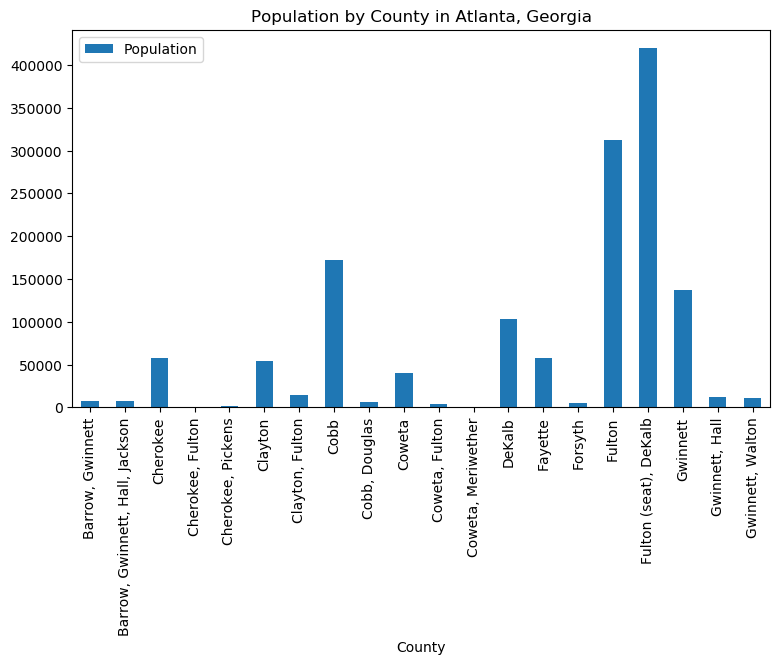

In [8]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Population by County in Atlanta, Georgia')
#On x-axis
#plt.xlabel('Counties', fontsize = 15)
#On y-axis
#plt.ylabel('Population', fontsize=15)
#giving a bar plot
df_atlanta.groupby('County')['Population'].sum().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()



## Methodology <a name="methodology"></a>

To compare the similarities of cities, I will explore Cities, segment them, and group them into clusters to find similar cities in Atlanta, Georgia. To be able to do that, we need to cluster data which is a form of unsupervised machine learning: k-means clustering algorithm.


##### Let's get the geographical coordinates of Atlanta, Georgia

In [9]:
address = 'Atlanta, Georgia'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Atlanta, Georgia are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Atlanta, Georgia are 33.7490987, -84.3901849.


####  Create a map of Atlanta, Georgia with Cities superimposed on top

In [10]:
map_georgia = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, county, city in zip(df_atlanta['Latitude'], df_atlanta['Longitude'], df_atlanta['County'], df_atlanta['City']):
    label = '{}, {}'.format(city, county)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_georgia)  
    
map_georgia

Next, we are going to start utilizing the  **Foursquare API**  to explore the Cities and segment them.

#### Define Foursquare Credentials and Version

In [11]:
CLIENT_ID = 'GGC3K0AGI0AZI2UUM1NGQBNQPSNJ44RREQYWHTJ00FANW443' # your Foursquare ID
CLIENT_SECRET = '2TGU23WQQKEITSG1011ZFXSG0DENDH5QCORZCXBFUMOVRRLC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GGC3K0AGI0AZI2UUM1NGQBNQPSNJ44RREQYWHTJ00FANW443
CLIENT_SECRET:2TGU23WQQKEITSG1011ZFXSG0DENDH5QCORZCXBFUMOVRRLC


#### Let's explore the first City in our dataframe.

In [12]:
df_atlanta.loc[0, 'City']

'Acworth'

Get the Cities's latitude and longitude values.

In [13]:
City_latitude = df_atlanta.loc[0, 'Latitude'] # City latitude value
City_longitude = df_atlanta.loc[0, 'Longitude'] # City longitude value

City_name = df_atlanta.loc[0, 'City'] # City name

print('Latitude and longitude values of {} are {}, {}.'.format(City_name, 
                                                               City_latitude, 
                                                               City_longitude))

Latitude and longitude values of Acworth are 34.0414666, -84.848962.


#### Now, let's get the top 100 venues that are  within a radius of 2000 meters.

First, create the GET request URL.

In [14]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    City_latitude, 
    City_longitude, 
    radius, 
    LIMIT)
url # display URL

results = requests.get(url).json()


In [15]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns


Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.postalCode',
       'venue.location.cc', 'venue.location.city', 'venue.location.state',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups'],
      dtype='object')

Define Function to read items from Foursquare

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Burnt Hickory Park,Park,34.034527,-84.840158
1,Dollar General,Discount Store,34.048726,-84.832739
2,Burnt Hickory Ballfields,Baseball Field,34.023908,-84.850913
3,Rose Hall Wedding & Event Center,Garden,34.025564,-84.839308


In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


### Exploring Cities in Atlanta, Georgia

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Code to run the above function on each City and create a new dataframe called georgia_venus

In [20]:
georgia_venues = getNearbyVenues(names=df_atlanta['City'],
                                   latitudes=df_atlanta['Latitude'],
                                   longitudes=df_atlanta['Longitude'])

Acworth
Alpharetta
Atlanta
Auburn
Austell
Avondale Estates
Ball Ground
Berkeley Lake
Braselton
Brooks
Buford
Canton
Chamblee
Clarkston
College Park
Cumming
Dacula
Decatur
Doraville
Duluth
Dunwoody
East Point
Fairburn
Fayetteville
Forest Park
Grantville
Grayson
Hapeville
Haralson
Holly Springs
Jonesboro
Kennesaw
Lake City
Lawrenceville
Lilburn
Lithonia
Loganville
Lovejoy
Marietta
Moreland
Morrow
Mountain Park
Nelson
Newnan
Norcross
Palmetto
Peachtree City
Pine Lake
Powder Springs
Rest Haven
Riverdale
Roswell
Sandy Springs
Senoia
Sharpsburg
Smyrna
Snellville
Stone Mountain
Sugar Hill
Suwanee
Turin
Tyrone
Union City
Waleska
Woodstock
Woolsey


In [21]:
print(georgia_venues.shape)
georgia_venues.head()

(2357, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acworth,34.041467,-84.848962,Burnt Hickory Park,34.034527,-84.840158,Park
1,Acworth,34.041467,-84.848962,Dollar General,34.048726,-84.832739,Discount Store
2,Acworth,34.041467,-84.848962,Burnt Hickory Ballfields,34.023908,-84.850913,Baseball Field
3,Acworth,34.041467,-84.848962,Rose Hall Wedding & Event Center,34.025564,-84.839308,Garden
4,Alpharetta,34.073757,-84.280203,Regal Avalon,34.071753,-84.276500,Movie Theater


In [22]:
georgia_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Acworth,4,4,4,4,4,4
Alpharetta,100,100,100,100,100,100
Atlanta,79,79,79,79,79,79
Auburn,9,9,9,9,9,9
Austell,6,6,6,6,6,6
Avondale Estates,100,100,100,100,100,100
Ball Ground,2,2,2,2,2,2
Berkeley Lake,25,25,25,25,25,25
Braselton,33,33,33,33,33,33


Let's find out how many unique categories can be curated from all the returned venues

In [23]:
print('There are {} uniques categories.'.format(len(georgia_venues['Venue Category'].unique())))

There are 274 uniques categories.


### Analysis <a name="analysis"></a>

Once having all our venues categorized , we wil proceed to group them by city and select the venues with most occureence. It will allow us to show which venues pre-domine in the cities to help to identify which options can be taken base on that.
Custering will help to split the groups and see which of them have similarities and will help for decision too.

In [24]:
# one hot encoding
georgia_onehot = pd.get_dummies(georgia_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
georgia_onehot['City'] = georgia_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [georgia_onehot.columns[-1]] + list(georgia_onehot.columns[:-1])
georgia_onehot = georgia_onehot[fixed_columns]

georgia_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Bookstore,Border Crossing,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Cemetery,Chinese Restaurant,Church,City,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Fabric Shop,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,High School,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Optical Shop,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Pool,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Rest Area,Restaurant,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tree,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Shop,Winery,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [25]:
georgia_onehot.shape

(2357, 274)

#### Next, let's group rows by City and by taking the mean of the frequency of occurrence of each category

In [26]:
georgia_grouped = georgia_onehot.groupby('City').mean().reset_index()
georgia_grouped

,City,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Bookstore,Border Crossing,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Cemetery,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Fabric Shop,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,High School,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Optical Shop,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Pool,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Rest Area,Restaurant,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tree,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Shop,Winery,Wings Joint,Women's Store
0,Acworth,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [27]:
georgia_grouped.shape

(63, 274)

Cities along with the top 5 most common venues

In [28]:
num_top_venues = 5

for hood in georgia_grouped['City']:
    print("----"+hood+"----")
    temp = georgia_grouped[georgia_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acworth----
            venue  freq
0  Baseball Field  0.25
1          Garden  0.25
2  Discount Store  0.25
3            Park  0.25
4     Yoga Studio  0.00


----Alpharetta----
                     venue  freq
0           Clothing Store  0.07
1      American Restaurant  0.06
2  New American Restaurant  0.06
3              Coffee Shop  0.04
4                     Café  0.03


----Atlanta----
         venue  freq
0  Art Gallery  0.06
1  Coffee Shop  0.06
2  Gas Station  0.05
3  Pizza Place  0.04
4          Gym  0.03


----Auburn----
                  venue  freq
0        Discount Store  0.22
1           Gas Station  0.11
2     Convenience Store  0.11
3  Gym / Fitness Center  0.11
4         Train Station  0.11


----Austell----
               venue  freq
0      Moving Target  0.33
1  Food & Drink Shop  0.17
2   Business Service  0.17
3       Dessert Shop  0.17
4       Home Service  0.17


----Avondale Estates----
                    venue  freq
0             Pizza Place  0.06
1        

4           Pizza Place  0.04


----Palmetto----
                     venue  freq
0              Music Venue  0.67
1                Gift Shop  0.33
2              Yoga Studio  0.00
3                   Museum  0.00
4  New American Restaurant  0.00


----Peachtree City----
              venue  freq
0    Breakfast Spot  0.17
1        Food Truck  0.17
2   Warehouse Store  0.17
3    Shop & Service  0.17
4  Business Service  0.17


----Pine Lake----
                  venue  freq
0           Gas Station  0.06
1        Discount Store  0.06
2           Pizza Place  0.05
3  Fast Food Restaurant  0.05
4    Chinese Restaurant  0.05


----Powder Springs----
                        venue  freq
0  Construction & Landscaping  0.12
1          Chinese Restaurant  0.06
2               Moving Target  0.06
3        Other Great Outdoors  0.06
4              Breakfast Spot  0.06


----Rest Haven----
                 venue  freq
0   Mexican Restaurant  0.11
1  Sporting Goods Shop  0.07
2        Hot Dog Joint 

function to sort the venues in descending order

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Display the TOP 10 Most Common venues near by City 

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = georgia_grouped['City']

for ind in np.arange(georgia_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(georgia_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acworth,Park,Baseball Field,Garden,Discount Store,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop
1,Alpharetta,Clothing Store,American Restaurant,New American Restaurant,Coffee Shop,Café,Fast Food Restaurant,Asian Restaurant,Mexican Restaurant,Sushi Restaurant,Deli / Bodega
2,Atlanta,Art Gallery,Coffee Shop,Gas Station,Pizza Place,Gym,American Restaurant,Asian Restaurant,Intersection,Trail,Restaurant
3,Auburn,Discount Store,Gym / Fitness Center,Convenience Store,Pharmacy,Breakfast Spot,Gas Station,Fast Food Restaurant,Train Station,Factory,Farm
4,Austell,Moving Target,Home Service,Food & Drink Shop,Dessert Shop,Business Service,Food Court,Food,Fondue Restaurant,Fabric Shop,Food Service


### Cluster Cities

apply k-means to cluster the city into 5 clusters and add in a dataframe.

In [31]:
from sklearn.cluster import KMeans
import sklearn.cluster.k_means_
km = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1, 
  verbose=True)

In [32]:
kclusters = 6
georgia_grouped_clustering = georgia_grouped.drop('City', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(georgia_grouped_clustering)
print(kmeans.labels_[0:10])
print(len(kmeans.labels_))

[4 1 1 1 4 1 0 1 1 4]
63


In [34]:
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
georgia_merged = df_atlanta
georgia_merged = georgia_merged.join(city_venues_sorted.set_index('City'), on='City')
georgia_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
georgia_merged.head(10) # check the last columns!
#print(georgia_merged.dtypes)

,index,City,County,Population,Land,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Acworth,Cobb,20425,8.24,34.041467,-84.848962,4.0,Park,Baseball Field,Garden,Discount Store,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop
1,13,Alpharetta,Fulton,57551,26.91,34.073757,-84.280203,1.0,Clothing Store,American Restaurant,New American Restaurant,Coffee Shop,Café,Fast Food Restaurant,Asian Restaurant,Mexican Restaurant,Sushi Restaurant,Deli / Bodega
2,26,Atlanta,"Fulton (seat), DeKalb",420003,133.15,33.767713,-84.420604,1.0,Art Gallery,Coffee Shop,Gas Station,Pizza Place,Gym,American Restaurant,Asian Restaurant,Intersection,Trail,Restaurant
3,28,Auburn,"Barrow, Gwinnett",6887,6.45,34.014798,-83.862974,1.0,Discount Store,Gym / Fitness Center,Convenience Store,Pharmacy,Breakfast Spot,Gas Station,Fast Food Restaurant,Train Station,Factory,Farm
4,30,Austell,"Cobb, Douglas",6581,5.97,33.818686,-84.678126,4.0,Moving Target,Home Service,Food & Drink Shop,Dessert Shop,Business Service,Food Court,Food,Fondue Restaurant,Fabric Shop,Food Service
5,33,Avondale Estates,DeKalb,2960,1.14,33.768758,-84.282757,1.0,Pizza Place,Breakfast Spot,Brewery,Thrift / Vintage Store,American Restaurant,Gastropub,Pub,Gym,Sandwich Place,Ice Cream Shop
6,37,Ball Ground,Cherokee,1433,5.81,34.341301,-84.408877,0.0,Boutique,Construction & Landscaping,Women's Store,Flea Market,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fondue Restaurant
7,43,Berkeley Lake,Gwinnett,1574,1.08,33.984316,-84.181954,1.0,Cosmetics Shop,Soccer Field,Gas Station,Shipping Store,Burger Joint,Moroccan Restaurant,Liquor Store,Scenic Lookout,Sandwich Place,Butcher
8,61,Braselton,"Barrow, Gwinnett, Hall, Jackson",7511,12.41,34.112358,-83.884870,1.0,Fast Food Restaurant,Liquor Store,Bank,Mexican Restaurant,Gas Station,Breakfast Spot,Pizza Place,Supermarket,Restaurant,Automotive Shop
9,67,Brooks,Fayette,524,4.29,33.292942,-84.493450,4.0,Home Service,Photography Studio,Discount Store,Moving Target,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,Event Service


visualize the resulting clusters

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(georgia_merged['Latitude'], georgia_merged['Longitude'], georgia_merged['City'], georgia_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

#### Cluster 1

In [36]:
df_cl1= georgia_merged.loc[georgia_merged['Cluster Labels'] == 0, georgia_merged.columns[[1] + list(range(5, georgia_merged.shape[1]))]]
df_cl1.head()

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Ball Ground,34.341301,-84.408877,0.0,Boutique,Construction & Landscaping,Women's Store,Flea Market,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fondue Restaurant


#### Cluster 2

In [37]:
df_cl2=georgia_merged.loc[georgia_merged['Cluster Labels'] == 1, georgia_merged.columns[[1] + list(range(5, georgia_merged.shape[1]))]]
df_cl2.head()

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Alpharetta,34.073757,-84.280203,1.0,Clothing Store,American Restaurant,New American Restaurant,Coffee Shop,Café,Fast Food Restaurant,Asian Restaurant,Mexican Restaurant,Sushi Restaurant,Deli / Bodega
2,Atlanta,33.767713,-84.420604,1.0,Art Gallery,Coffee Shop,Gas Station,Pizza Place,Gym,American Restaurant,Asian Restaurant,Intersection,Trail,Restaurant
3,Auburn,34.014798,-83.862974,1.0,Discount Store,Gym / Fitness Center,Convenience Store,Pharmacy,Breakfast Spot,Gas Station,Fast Food Restaurant,Train Station,Factory,Farm
5,Avondale Estates,33.768758,-84.282757,1.0,Pizza Place,Breakfast Spot,Brewery,Thrift / Vintage Store,American Restaurant,Gastropub,Pub,Gym,Sandwich Place,Ice Cream Shop
7,Berkeley Lake,33.984316,-84.181954,1.0,Cosmetics Shop,Soccer Field,Gas Station,Shipping Store,Burger Joint,Moroccan Restaurant,Liquor Store,Scenic Lookout,Sandwich Place,Butcher


#### Cluster 3

In [38]:
df_cl3 = georgia_merged.loc[georgia_merged['Cluster Labels'] == 2, georgia_merged.columns[[1] + list(range(5, georgia_merged.shape[1]))]]
df_cl3.head()

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Canton,34.243448,-84.566131,2.0,Health & Beauty Service,Women's Store,Flea Market,Fabric Shop,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop


In [39]:
df_cl4 = georgia_merged.loc[georgia_merged['Cluster Labels'] == 3, georgia_merged.columns[[1] + list(range(5, georgia_merged.shape[1]))]]
df_cl4.head()

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Grantville,33.236345,-84.935653,3.0,Convenience Store,Campground,Women's Store,Fish & Chips Shop,Fabric Shop,Factory,Farm,Farmers Market,Fast Food Restaurant,Flea Market


In [40]:
df_cl5 = georgia_merged.loc[georgia_merged['Cluster Labels'] == 4, georgia_merged.columns[[1] + list(range(5, georgia_merged.shape[1]))]]
df_cl5.head()

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acworth,34.041467,-84.848962,4.0,Park,Baseball Field,Garden,Discount Store,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop
4,Austell,33.818686,-84.678126,4.0,Moving Target,Home Service,Food & Drink Shop,Dessert Shop,Business Service,Food Court,Food,Fondue Restaurant,Fabric Shop,Food Service
9,Brooks,33.292942,-84.493450,4.0,Home Service,Photography Studio,Discount Store,Moving Target,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,Event Service
15,Cumming,34.203527,-84.165649,4.0,Tennis Court,Construction & Landscaping,Men's Store,Locksmith,Discount Store,Grocery Store,Antique Shop,Donut Shop,Gym / Fitness Center,Farm
23,Fayetteville,33.451925,-84.545140,4.0,Dance Studio,Construction & Landscaping,Farm,Furniture / Home Store,Clothing Store,Women's Store,Flea Market,Factory,Farmers Market,Fast Food Restaurant


In [41]:
df_cl6 = georgia_merged.loc[georgia_merged['Cluster Labels'] == 5, georgia_merged.columns[[1] + list(range(5, georgia_merged.shape[1]))]]
df_cl6.head()

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,Senoia,33.314554,-84.58936,5.0,Racetrack,Women's Store,Flea Market,Fabric Shop,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop


In [42]:
df_school = pd.read_csv('Georgia_school_dataset.csv')
df_univ = pd.read_csv('Georgia_University_dataset.csv')
df_house = pd.read_csv('Georgia_House_Prices_dataset.csv')

## Results and Discussion <a name="results"></a>

After the analysis done, we can review the list of posibilities availables in each cluster that can be considered when we want to select a particular place. Definitively count with the collection of venues will allow to select and consider which will be the most important per each individual person in the moment to decide what city choose to live.
Also, the plots allow to have a view of the ranking of the schools and universities and house prices that will complement the variables to consider in the decision time.

In [43]:
#df_georgia[(df_georgia['County'].str.contains('Fulton'))
Place_tolive = georgia_merged[(georgia_merged['City'].str.contains('Kennesaw')) | (georgia_merged['City'].str.contains('Marietta')) | (georgia_merged['City'].str.contains('Sandy Springs'))]
Place_tolive

,index,City,County,Population,Land,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,259,Kennesaw,Cobb,29783,9.44,34.026161,-84.687084,1.0,Sandwich Place,Mexican Restaurant,BBQ Joint,Pizza Place,American Restaurant,Rental Car Location,Clothing Store,Movie Theater,Arts & Crafts Store,Chinese Restaurant
38,297,Marietta,Cobb,56579,23.08,33.948371,-84.612413,1.0,Fast Food Restaurant,Breakfast Spot,Trail,Hardware Store,Bank,Shopping Mall,Sandwich Place,Yoga Studio,Park,Big Box Store
52,416,Sandy Springs,Fulton,93853,37.64,33.943358,-84.352816,1.0,Italian Restaurant,Mexican Restaurant,Pizza Place,Nail Salon,American Restaurant,Hotel,Pharmacy,Salon / Barbershop,Steakhouse,Ice Cream Shop


In [44]:
df_rs_school = df_atlanta.merge(df_school, how='inner', left_on='County', right_on='County')
df_rs_school.head()

,index,City,County,Population,Land,Latitude,Longitude,School,Average_Standard_Score,Rank,Schools per County
0,1,Acworth,Cobb,20425,8.24,34.041467,-84.848962,Allatoona High School,80.5,33,1
1,1,Acworth,Cobb,20425,8.24,34.041467,-84.848962,Harrison High School,89.2,14,1
2,1,Acworth,Cobb,20425,8.24,34.041467,-84.848962,Hillgrove High School,86.1,23,1
3,1,Acworth,Cobb,20425,8.24,34.041467,-84.848962,Kell High School,70.9,83,1
4,1,Acworth,Cobb,20425,8.24,34.041467,-84.848962,Kennesaw Mountain High School,80.3,44,1


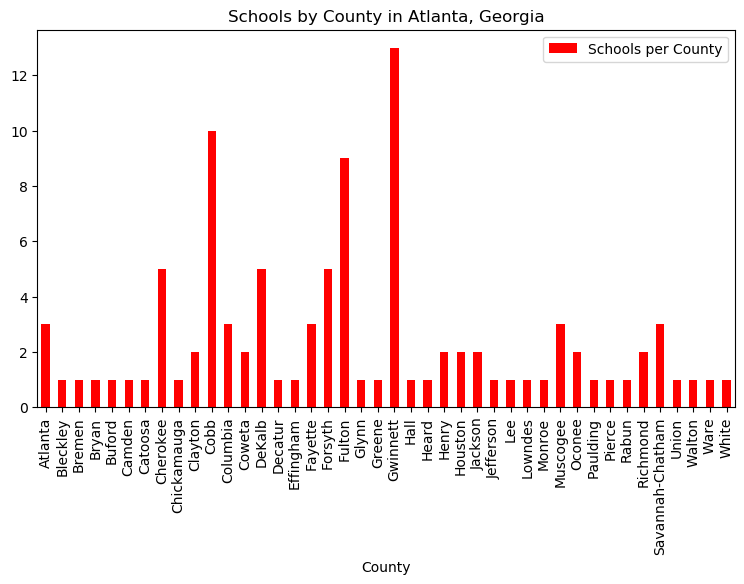

In [45]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Schools by County in Atlanta, Georgia')
#On x-axis
#plt.xlabel('Counties', fontsize = 15)
#On y-axis
#plt.ylabel('Population', fontsize=15)
#giving a bar plot
df_school.groupby('County')['Schools per County'].sum().plot(kind='bar', color='red')
#legend
plt.legend()
#displays the plot
plt.show()


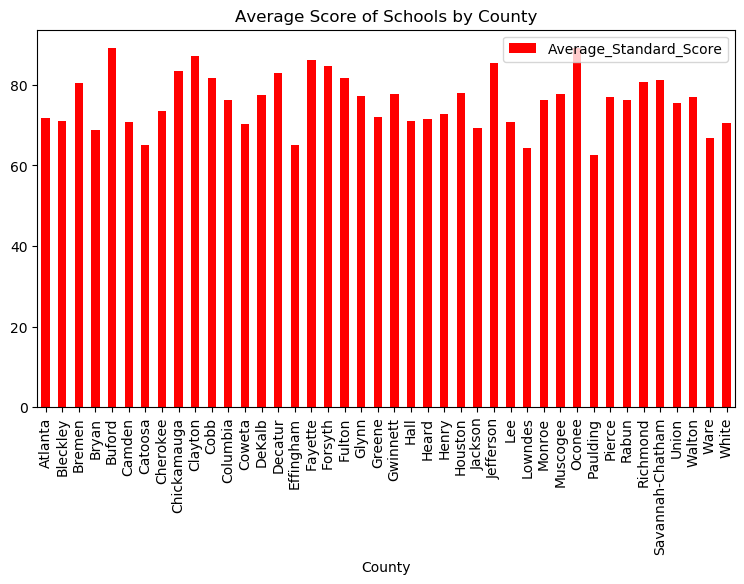

In [46]:
plt.figure(figsize=(9,5), dpi = 100)
#df_sch1 = df_school[(df_school['County'].str.contains('Fulton')) & (df_school['City'].str.contains('Sandy Springs'))]
# title
plt.title('Average Score of Schools by County')
#On x-axis
#plt.xlabel('Counties', fontsize = 15)
#On y-axis
#plt.ylabel('Population', fontsize=15)
#giving a bar plot
df_school.groupby('County')['Average_Standard_Score'].mean().plot(kind='bar', color='red')
#legend
plt.legend()
#displays the plot
plt.show()


Text(0.5, 1.0, 'Ranking of Top Universities in Georgia')

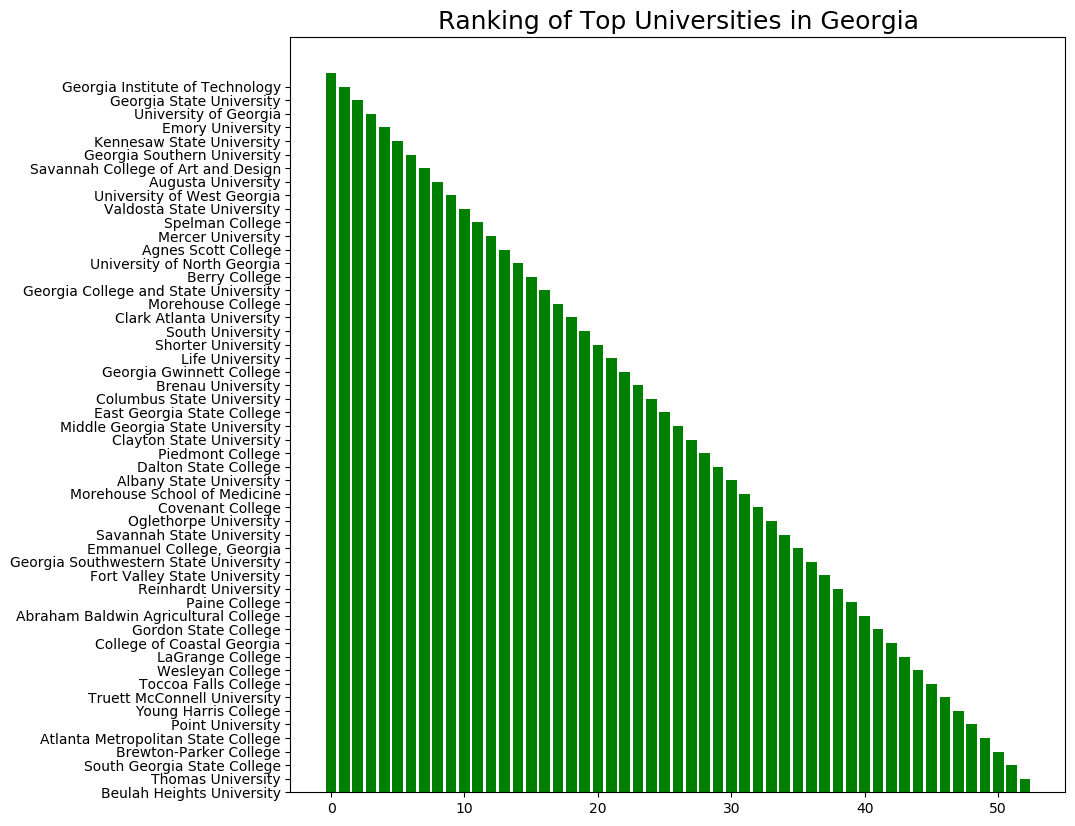

In [47]:
plt.figure(figsize=(10,10), dpi = 100)
a = df_univ['University']
posicion_y = np.arange(len(a))
b = df_univ['Ranking']
plt.bar(posicion_y, b , color='green' ) #, align = "center")
plt.yticks(posicion_y, a, fontsize = 10, color='black' )
#plt.xlabel('')
plt.title("Ranking of Top Universities in Georgia" , fontsize = 18, color='black')

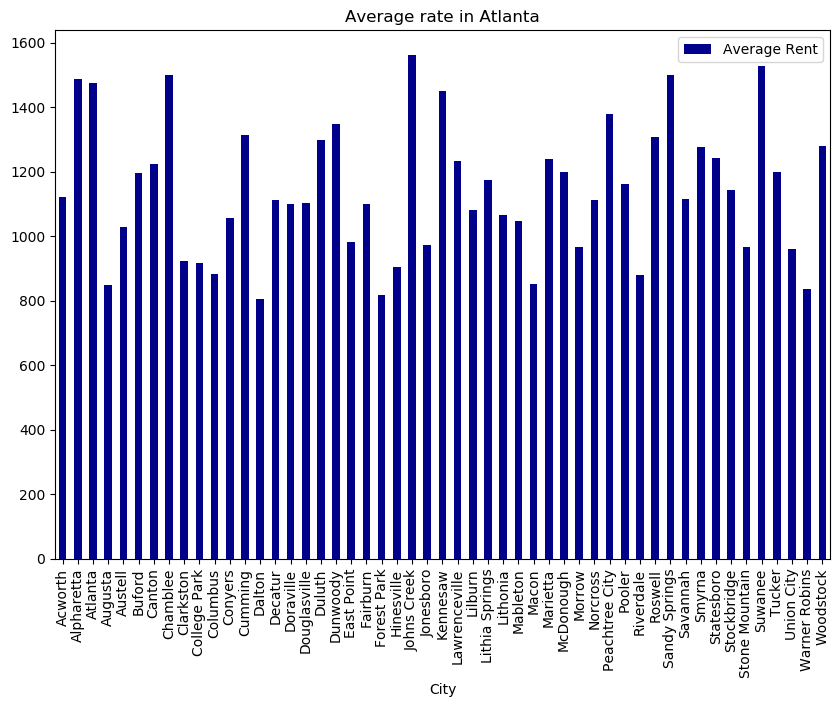

In [48]:
plt.figure(figsize=(10,7), dpi = 100)

# title
plt.title('Average rate in Atlanta')
#On x-axis
#plt.xlabel('Counties', fontsize = 15)
#On y-axis
#plt.ylabel('Population', fontsize=15)
#giving a bar plot
df_house.groupby('City')['Average Rent'].mean().plot(kind='bar', color='darkblue')
#legend
plt.legend()
#displays the plot
plt.show()


## Conclusion <a name="conclusion"></a>

Finally , we can conclude that the main purpose of this project is to develop and show the different oportunities that a person can consider when want to take a decision to choose a city where to live. 
In our case , we have used K-means cluster algorithm that helped us to group all the venues provided by Foursquare and 
what put in table as options of places that the user can consider at the moment to take the decision.
Also, Ranking of schools, universities and house prices show the best scenaries to consider.
Particularly, based on the list of venues, family preferences and the other variables like school , univerity and house prices our decision is most inclided by Cities as Marieta, Kennessaw and Sandy Springs.
